# Repeated Measurement Designs
As alluded to in the introduction, experiments where multiple measurements are taken from the same subject are problematic from an analysis perspective. These are known as *repeated measurement*, *repeated measures* or *within-subject* designs. In this first part, we will explore *why* these designs cause problems, before spending the rest of the lesson discussing some traditional remedies. This is all ground work to allow us to begin on the core topic of *linear mixed-effects models* next week. 

Up until now the only experimental designs we have considered, from an analysis perspective, are those where a *single* measurement is taken from each subject[^subject-foot]. This means that every row of our data sets and every value of $y$ was considered a *separate* subject. Thinking back to the idea of factorial experiments, this means that *different* experimental conditions represent different groups of individuals. No single individual was present in *both* groups and thus different subjects were randomised to different experimental conditions. These are known as *independent measures* or *between-subjects* designs. For example, the illustration in  {numref}`between-sub-fig`. shows a between-subjects design where half the sample undergo a happy mood induction and the other half undergo a sad mood induction.

```{figure} ./images/between-subjects-design.png
---
width: 600px
name: between-sub-fig
---
An example of a between-subjects design for a happy and sad mood induction experiment.
```

A different form of design comes from an experiment where each subject participates in *every* experimental condition. For instance, each subject performs a task that has 3 different difficulty conditions (*easy*, *medium*, *hard*). If each subject performs each of these conditions then we have 3 measurements per-subject and this is known as a *repeated measures* or *within-subject* design[^long-foot]. In this example, there is nothing fundamental about the experiment that forces it to be repeated measurements. A between-subjects variant could easily be conducted where each subject participates in only *one* of the experimental conditions. As such, for this particular example, repeated measurements are a *choice* rather than a fundamental reality of the data. This experimental setup is illustrated in {numref}`within-sub-fig`.

```{figure} ./images/within-subject-design.png
---
width: 500px
name: within-sub-fig
---
An example of a within-subject design for 3 different difficulty conditions of an experiment.
```

Finally, both *between-subjects* and *within-subject* designs can be combined. As an example, we could continue our example of task difficulty, where every subject participates in every condition. However, now let us say that half those subjects receive a *sad* mood induction and half receive a *happy* mood induction. We now have *two* experimental manipulations, one of which is conducted *within-subject* (difficulty condition) and one of which is conducted *between-subjects* (mood induction). This is illustrated in {numref}`mixed-measures-fig`.

```{figure} ./images/mixed-measures-design.png
---
width: 500px
name: mixed-measures-fig
---
An example of a design with both a within-subject and between-subjects experimental manipulation.
```

These types of designs have a variety of names, none of which are ideal. Psychologists often call these *mixed* designs, as a shorthand for *mixed measures*. This can seem sensible, but unfortunately *mixed* could also mean *mixed-effects*, which is the focus of this section of the unit. To add to the confusion, mixed-measures designs can be analysed using mixed-effects methods, but the two are not always equivalent. A psychologist and a statistician could have a perfectly reasonable conversation about "mixed models", not even realising they are talking about different things. Statisticians will often call these *split-plot* designs, due to their history in the world of agriculture, but this is not a term psychologists often use. For our purpose, we can collapse these types of designs under the generic banner of *repeated measurement* designs to avoid any confusion. When doing this, we can define repeated measurement designs as those *with at least* one within-subject manipulation. This does not exclude the possibility of any other type of manipulation and thus covers both "pure" within-subject designs and mixed within-subject/between-subjects designs

## Repeated Measurements and Correlation
Now that we have established what repeated measurements are in the context of experimental design, we can turn to the main topic of this part of the lesson: *why are repeated measurements a problem*? To understand the issue, it is useful to see some example repeated measurement data. Below, we load the `selfesteem` data set from the `datarium` package. These contains measures of self-esteem taken from 10 subjects across 3 different time-points, as shown below.

In [1]:
library('datarium')
data(selfesteem)
selfesteem

   id       t1       t2       t3
1   1 4.005027 5.182286 7.107831
2   2 2.558124 6.912915 6.308434
3   3 3.244241 4.443434 9.778410
4   4 3.419538 4.711696 8.347124
5   5 2.871243 3.908429 6.457287
6   6 2.045868 5.340549 6.653224
7   7 3.525992 5.580695 6.840157
8   8 3.179425 4.370234 7.818623
9   9 3.507964 4.399808 8.471229
10 10 3.043798 4.489376 8.581100

Because these are measurements *across time* and *ordered*, it would be more correct to characterise this as a *longitudinal* design. But, to keep things simple, we will ignore the temporal aspect for now and just focus on the time-points as if they were any repeated measurements where order does not matter. To see the core issue here, let us examine the pairs plots between the time-points

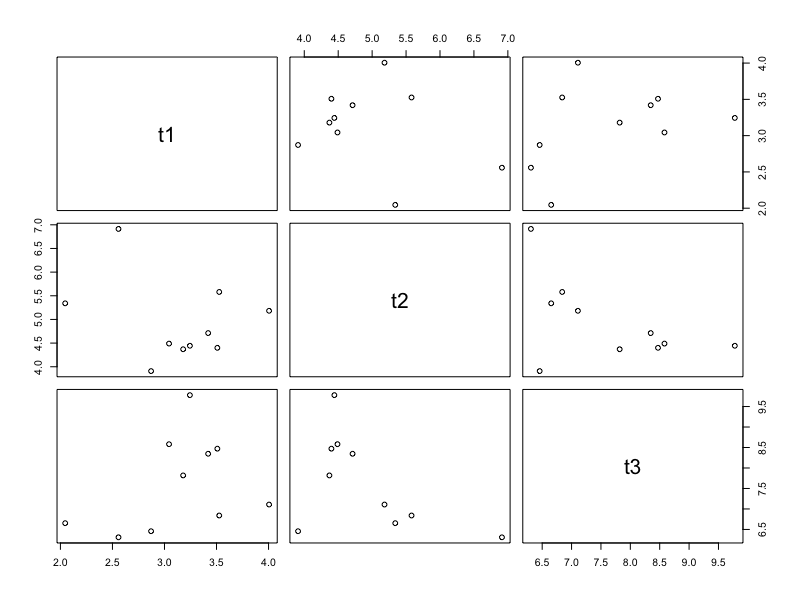

In [2]:
with(selfesteem, pairs(~ t1 + t2 + t3))

Although somewhat subtle, notice that there appears to be a relationship between time-points, particularly those that are close (such as `t2` and `t3`). Let us calculate the correlation

In [3]:
cor(selfesteem[,2:4])

          t1         t2         t3
t1  1.000000 -0.2672690  0.3606020
t2 -0.267269  1.0000000 -0.5230331
t3  0.360602 -0.5230331  1.0000000

So, now we see the core problem here: *repeated measurements are correlated*. 

Although this may not necessarily seem like a big deal, this is actually a *massive* problem for our statistical modelling framework. The reasons *why* will not be very clear right now, but we will discuss them in more detail further below. Before getting there, it is worth highlighting that this correlation is not some funny feature of this one particular dataset. It is a feature of *all* repeated measurements. So much so that we never usually check for it, we just assume that it is there. This is a *feature of reality*. If multiple measurements are taken from the same experimental unit then they will be connected in some fashion. This is true whether the units are *people*, *rats*, *schools*, *classrooms*, *brains*, *cages* or anything else. The point is that the data come from the same source and that source creates a *connection* between measurements. 

`````{admonition} Repeated Measurements on Human Subjects
:class: tip
In the case of human subjects, we can think of correlation as representing the *internal consistency* of a single individual. If someone is slow at responding during one experimental condition, it is likely they will be slow responding during another experimental condition. There is not pure randomness at play here. There is not an infinite range of responses a subject could give during one experimental condition, irrespective of the responses given during a different experimental condition. The person themselves constrains the reasonable range of responses. As such, their responses during one condition provides a prediction of their responses during a different condition. Their biology and psychology provides a constraint that is captured by the correlation. Importantly, this does not apply to measurements taken from a different subject, who will have their own range of constraints. As such, we conceptualise measurements from *within* a subject as correlated, but measurements from *between* subjects as independent. This is why this has not been a problem before, because every previous example we have seen involved only a *single* measurement of each experimental unit.
``````

## Why is Correlation a Problem?

### Correlation and the Linear Model Assumptions
... In order to work with the linear model machinery, we need our outcome to be a *single* variable, rather than *multiple* variables. 

Although this dataset is in the *wide* format, it is important to realise that `t1`, `t2` and `t3` are *not* different variables. They are all measurements of `selfesteem` organised by subject. The reality is that these are all the *same* variable, as is made clearer by converting this dataset to *long* format

In [4]:
library(reshape2)

# reshape wide -> long
selfesteem.long <- melt(selfesteem,               # wide data frame
                        id.vars='id',             # what stays fixed?
                        variable.name="time",     # name for the new predictor
                        value.name="selfesteem")  # name for the new outcome

selfesteem.long <- selfesteem.long[order(selfesteem.long$id),] # order by ID
rownames(selfesteem.long) <- seq(1,30)                         # fix row names

print(selfesteem.long)

   id time selfesteem
1   1   t1   4.005027
2   1   t2   5.182286
3   1   t3   7.107831
4   2   t1   2.558124
5   2   t2   6.912915
6   2   t3   6.308434
7   3   t1   3.244241
8   3   t2   4.443434
9   3   t3   9.778410
10  4   t1   3.419538
11  4   t2   4.711696
12  4   t3   8.347124
13  5   t1   2.871243
14  5   t2   3.908429
15  5   t3   6.457287
16  6   t1   2.045868
17  6   t2   5.340549
18  6   t3   6.653224
19  7   t1   3.525992
20  7   t2   5.580695
21  7   t3   6.840157
22  8   t1   3.179425
23  8   t2   4.370234
24  8   t3   7.818623
25  9   t1   3.507964
26  9   t2   4.399808
27  9   t3   8.471229
28 10   t1   3.043798
29 10   t2   4.489376
30 10   t3   8.581100


So, now we have our single outcome variable $y$, suitable for use in a linear model. Except that we now have an outcome variable where *individual elements are not independent*. Rather than each row representing an independent draw from some probability distribution, we now have rows that are *correlated*, based on whether they come from the same subject.

`````{admonition} Why Are Repeated Measurements Correlated?
:class: tip
This is, in effect, a principle of reality. There is an *internal consistency* to people that means that they will produce a similar pattern of results across repeats. 

``````

Why does the correlation matter? Recall that a core assumption of the normal linear model is that the data/errors are $i.i.d.$ We previously wrote this as

$$
\begin{alignat*}{1}
    y &= \mu + \epsilon \\
    \epsilon &\sim^{i.i.d.}\mathcal{N}(0,\sigma^{2})
\end{alignat*}
$$

Under repeated measurements, the $independent$ criteria is clearly broken. Where this is most important is for *estimation*. Both OLS and MLE/REML assume independence when performing estimation. When the data are *dependent*, this causes bias to creep in, rendering some of the parameter estimates *larger* or *smaller* than they should be. We will discuss this in more detail further below, but this should be enough for the moment to see why this might be a problem for the approaches we discussed last semester.

### Correlation and the Standard Errors
Given everything above, what are the implications for our statistical model when there is correlation between measurements? As we have discussed, nothing about the *mean function* changes. So if we are only interested in estimating effects as defined within the mean function, nothing changes. This means that regression slopes, cell means and mean differences remain unchanged. However, what *does* change is the *variance function*. The biggest practical implication of this is that *correlation changes the standard errors*. This means that our *uncertainty* is different under correlation. If we get this wrong, the standard errors will be wrong, the test statistical will be wrong, the confidence intervals will be wrong and the $p$-values will be wrong. In short, neglecting to model the correlational structure will make our *inference wrong*. In a more general sense, neglecting the correlational structure will lead to a poor model of the data-generating process, because correlation is a *fundamental* element of how the data came to be. If we ignore it, we can never hope to have an accurate picture of where our data came from. 

### Theory
The simplest demonstration of how correlation affects uncertainty comes directly from the properties of a random variable. It is a standard result in probability theory that the variance of the *difference* between two random variables ($y_{1}$ and $y_{2}$) is given by 

$$
\text{Var}\left(y_{1} - y_{2}\right) = \text{Var}\left(y_{1}\right) + \text{Var}\left(y_{2}\right) - 2\text{Cov}\left(y_{1},y_{2}\right).
$$

To understand this, consider the fact that subtracting two random variables produces a *new* random variable that captures their *difference*. This new random variable will also have a distribution. So what we are thinking above in the above equation is the *width* of the distribution of the *difference* between $y_{1}$ and $y_{2}$. What this is saying is that the width of this distribution is a function of the variances from the two individual distributions *and* their degree of correlation. If the correlation is *positive* the variance will shrink, if the correlation is *negative* the variance will *grow*. Either way, our uncertainty around the difference between these two random variables *depends* upon their degree of correlation

### Simulation

To see this, we can run a simulation in `R`. First, we use the `mvrnorm()` function from the `MASS` package to simulate 1,000 realisations of two repeated measurements with a correlation of $\rho = 0.8$. To do this, we use the following sampling model:

$$
\begin{bmatrix}
    y_{i1} \\
    y_{i2} \\
\end{bmatrix}
\sim\mathcal{N}\left(
\begin{bmatrix}
    2 \\
    3 \\
\end{bmatrix},
\begin{bmatrix}
    1 & 0.8 \\
    0.8 & 1 \\
\end{bmatrix}
\right)
$$

We can then compare this to 1,000 realisations of two independent measurements with a correlation of $\rho = 0$. To do this, we use the following sampling model

$$
\begin{bmatrix}
    y_{i1} \\
    y_{i2} \\
\end{bmatrix}
\sim\mathcal{N}\left(
\begin{bmatrix}
    2 \\
    3 \\
\end{bmatrix},
\begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
\end{bmatrix}
\right).
$$

The `R` code is

In [5]:
Sigma.dep <- matrix(c(var,cov,
                      cov,var), nrow=2, ncol=2)

Sigma.ind <- matrix(c(var,   0,
                        0, var), nrow=2, ncol=2)

y.dep <- mvrnorm(n=1000, mu=Mu, Sigma=Sigma.dep) # dependence
y.ind <- mvrnorm(n=1000, mu=Mu, Sigma=Sigma.ind) # independence

: [1m[33mError[39m in `mvrnorm()`:[22m
[33m![39m could not find function "mvrnorm"

In both cases, we conceptualise the columns of `y.dep` and `y.ind` as two different conditions of an experiment. As such, our interest lies in the *difference* between the columns. As a final step, we subtract the columns and then compare the distributions of differences.

In [ ]:
diff.dep <- y.dep[,1] - y.dep[,2]
diff.ind <- y.ind[,1] - y.ind[,2]

hist(diff.dep, xlim=c(-8,6), xlab='Mean Difference', main='Correlated')
hist(diff.ind, xlim=c(-8,6), xlab='Mean Difference', main='Uncorrelated')

Notice that the distribution of repeated measurement differences is much *narrower* than the distribution of independent differences. This is the theory in action. ... This is why there is a *power* advantage to repeated measurements. ... The variability of the difference is much smaller because the conditions are going to be *more similar* when they are correlated. As such, we do not expect wild differences between them. The two conditions should generally be very similar and thus their difference should be consistently smaller than in the independent case, where much larger differences are possible.

We can see how this will affect the $t$-statistic by calculating

In [ ]:
library(MASS)

n.sims <- 1000
mu.1   <- 5      
mu.2   <- 8
var    <- 1
cor    <- 0.8
cov    <- cor*sqrt(var)*sqrt(var)

Mu    <- c(mu.1,mu.2)
Sigma <- matrix(c(var,cov,
                  cov,var), nrow=2, ncol=2)
mean.diff.sim <- rep(0,n.sims)
for (i in 1:n.sims){
  y.sim <- mvrnorm(n=100, mu=Mu, Sigma=Sigma)
  mean.diff.sim[i] <- mean(y.sim[,1]) - mean(y.sim[,2])
}

par(mfrow=c(1,2))
hist(mean.diff.sim, probability=TRUE, xlim=c(-3.5,-2.5))
curve(dnorm(x, mean=mu.1-mu.2, sd=sd(mean.diff.sim)), 
      col="darkblue", lwd=2, add=TRUE)

Mu    <- c(mu.1,mu.2)
Sigma <- matrix(c(var,0,
                  0,var), nrow=2, ncol=2)
mean.diff.sim <- rep(0,n.sims)
for (i in 1:n.sims){
  y.sim <- mvrnorm(n=100, mu=Mu, Sigma=Sigma)
  mean.diff.sim[i] <- mean(y.sim[,1]) - mean(y.sim[,2])
}
hist(mean.diff.sim, probability=TRUE, xlim=c(-3.5,-2.5))
curve(dnorm(x, mean=mu.1-mu.2, sd=sd(mean.diff.sim)), 
      col="darkred", lwd=2, add=TRUE)

[^subject-foot]: We will refer generically to *subjects* throughout these materials, as the assumption is that you will generally be working with behavioural data from humans. However, it is worth knowing that statistics has the more general concept of a *unit of analysis*, which could be *humans*, *rats*, *genes*, *schools* or anything else that our inference is based upon.

[^long-foot]: When repeated measurements are taken across longer temporal gaps (e.g. different days, weeks or months), these types of design are often known as *longitudinal* designs. Similarly, if many measurements are taken in close succession over time, these types of data are often viewed as a *time series*. The only real difference is that the measurements have a *specific order* to them and the analysis has to take this order into account. For most repeated measurement designs, the order of the repeats does not matter and is often randomised across subjects.